<a href="https://colab.research.google.com/github/ThiagoMatosBR/Fundos-CVM/blob/master/Rede%20Neural/Captcha_after_drop_ajusts_%2B_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import random

# Notebook com detalhes sobre a arquitetura da rede neural convolucional

In [2]:
uploaded = files.upload()

Saving labels_y_data - 31552 digits.npz to labels_y_data - 31552 digits.npz
Saving pictures_x_data - 31552 digits.npz to pictures_x_data - 31552 digits.npz


In [0]:
x_train = np.load('pictures_x_data - 31552 digits.npz')
y_train = np.load('labels_y_data - 31552 digits.npz')

In [0]:
X_train = x_train.f.arr_0
Y_train = y_train.f.arr_0

In [5]:
X_train.shape

(31552, 28, 28)

In [6]:
Y_train.shape

(31552,)

## Exemplos de dígitos que compõem a base de dados:

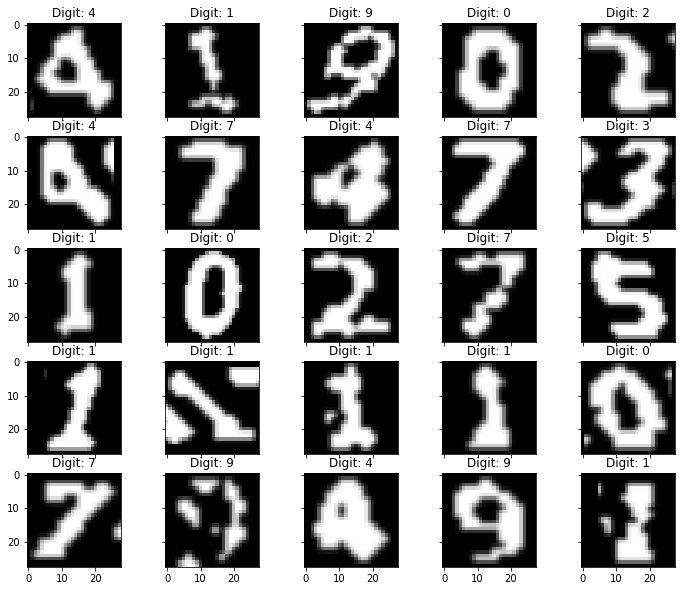

In [7]:
fig, ax = plt.subplots(5,5, sharex='col', sharey='row', figsize = (12,10))
for j in range(5):
    possibilities = [random.randint(1,31500) for _ in range(5)]
    for i, item in enumerate(possibilities):
        ax[i,j].imshow(X_train[item], "gray")
        ax[i,j].set_title(f"Digit: {Y_train[item]}")

plt.show()

In [0]:
# Realizando a normalização dos dados, o que equivale a dividir por 255
X_train = tf.keras.utils.normalize(X_train)

In [9]:
# Dados estão no formato float64. Convertendo para float32
X_train[0].dtype

dtype('float64')

In [0]:
X_train = X_train.astype('float32')
# X_test = x_test.astype('float32')

In [0]:
#Realizando um reshape no formato aceito pelo Keras
#Basicamente o Keras requer os dados na seguinte dimensão: (Quantidade de Imagens/arrays, shape1, shape2, canais)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [0]:
#Os labels precisam ser vetorizados, por ex: 5 = [0,0,0,0,0,1,0,0,0,0]

Y_train = to_categorical(Y_train, 10)

## Informações sobre o modelo:

 - Camada de convolução com 32 features filters. Função de ativação: RELU.
 Kernel convencional de 3 x 3 e stride unitário.
 - Camada de Pooling de 2x2
 - Camada de convolução com 64 features filters. Função de ativação: RELU.
 - Camada de Pooling 2x2.
 - Droptout de 25% dos neurônios.
 - Dense layer com 128 neurônios.
 - Droptout de 25% dos neurônios.
 - Camada de saída com 10 neurônios (correspondente aos 10 dígitos).
 - Utilizada distribuição de probabilidade softmax na camada de saída.

 Otimizadosr utilizado para o gradient descent: Adam. Função de custo: cross entropy categorical.

 Tentando modelos com padding nas camadas de convolução, mais filtros nas camadas de convolução, mais camadas de convolução, diferentes níveis de dropout e diferentes kernels / strides. Todas as combinações resultaram em mesmo nível de performance ~96%. 

 A solução que apresentou melhora de performance foi através de data augmentation com mais camadas de convolução / max e dense layers. Performance aumentou para ~97%. 

  - Optado assim por modelo mais simples, que é apresentado abaixo.

In [0]:
#Construindo o modelo:

model = tf.keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Este modelo obteve performance de 0.9613 quando treinado por 10 epochs e com bach de 50

In [0]:
# #Construindo o modelo:

# model = tf.keras.models.Sequential()
# model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu', padding='same', input_shape = X_train.shape[1:]))
# model.add(MaxPool2D((2,2)))
# model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# model.add(MaxPool2D((2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(10, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Salvando no objeto history para permitir a plotagem posterior
history = model.fit(X_train, Y_train, batch_size=50, epochs=10, verbose=1, validation_split = 0.1, shuffle = True)

Epoch 1/10
568/568 [==============================] - 3s 5ms/step - loss: 0.4383 - accuracy: 0.8757 - val_loss: 0.2266 - val_accuracy: 0.9404
Epoch 2/10
568/568 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9484 - val_loss: 0.1928 - val_accuracy: 0.9499
Epoch 3/10
568/568 [==============================] - 2s 4ms/step - loss: 0.1818 - accuracy: 0.9537 - val_loss: 0.1789 - val_accuracy: 0.9553
Epoch 4/10
568/568 [==============================] - 2s 4ms/step - loss: 0.1651 - accuracy: 0.9593 - val_loss: 0.1666 - val_accuracy: 0.9610
Epoch 5/10
568/568 [==============================] - 2s 4ms/step - loss: 0.1476 - accuracy: 0.9621 - val_loss: 0.1663 - val_accuracy: 0.9610
Epoch 6/10
568/568 [==============================] - 2s 4ms/step - loss: 0.1407 - accuracy: 0.9644 - val_loss: 0.1673 - val_accuracy: 0.9585
Epoch 7/10
568/568 [==============================] - 3s 4ms/step - loss: 0.1328 - accuracy: 0.9656 - val_loss: 0.1689 - val_accuracy: 0.9594
Epoch 

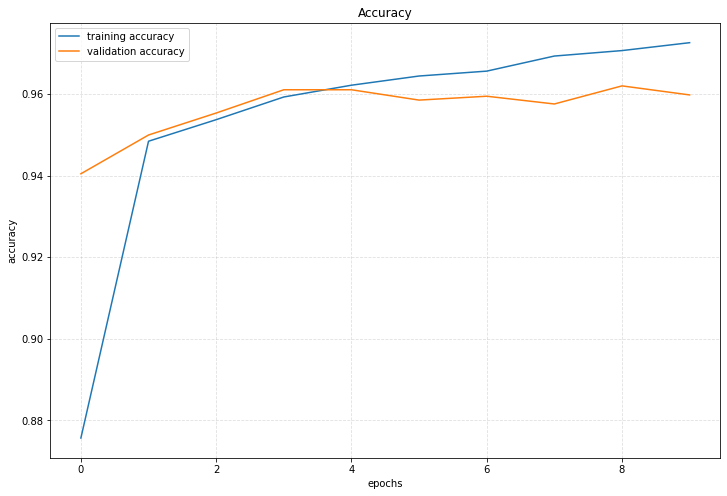

In [24]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True, which='both', linestyle = '--', alpha = 0.4)
# plt.show()
plt.savefig('Accuracy x Epochs - Model 32C64C128D10D.png')

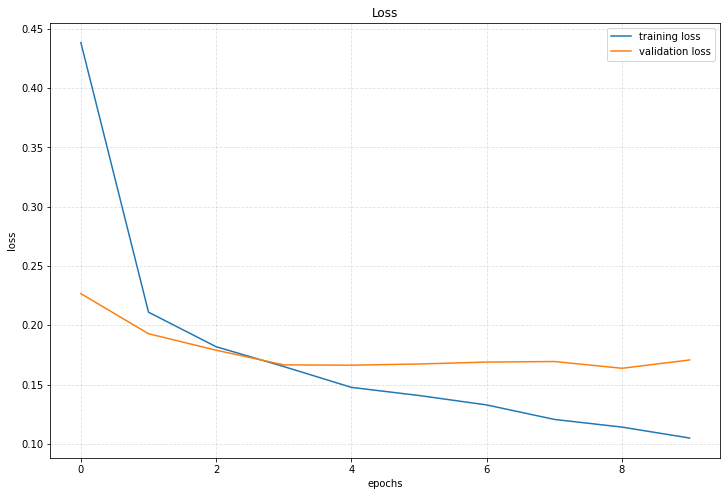

In [25]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True, which='both', linestyle = '--', alpha = 0.4)
# plt.show()
plt.savefig('Loss x Epochs - Model 32C64C128D10D.png')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [0]:
model.save("Captcha Solver - Simple Architecture.h5")